In [41]:
# Data Wrangling libs
import numpy as np
import pandas as pd

# Vizualization libs
import matplotlib.pyplot as plt
import seaborn as sns

# Data Encoding libs
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Splitting dataset
from sklearn.model_selection import train_test_split

# Model Training Algorithms
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation libs
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import metrics

# data processing

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from time import time


import dask.dataframe as dd
from dask.distributed import Client
import os
import dask

In [42]:
client = Client(n_workers=4)
client

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42761 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40483
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:42761/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46585'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41963'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40891'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43113'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35067', name: 2, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35067
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51640
INFO:distributed.scheduler:Reg

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:42761/status,
Dashboard: http://127.0.0.1:42761/status,Workers: 4
Total threads: 4,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40483,Workers: 4
Dashboard: http://127.0.0.1:42761/status,Total threads: 4
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:37371,Total threads: 1
Dashboard: http://127.0.0.1:42081/status,Memory: 3.17 GiB
Nanny: tcp://127.0.0.1:46585,


In [52]:
# Define the path to your CSV file
csv_file_path = 'data/ObesityDataSet.csv'

# Read the CSV file into a Dask DataFrame
data = dd.read_csv(csv_file_path,assume_missing=True)



# Perform operations on the Dask DataFrame as needed
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
npartitions=1,,,,,,,,,,,,,,,,,
,object,float64,float64,float64,object,object,float64,float64,object,object,float64,object,float64,float64,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [44]:
data.info()
data.describe()
# Checking weather a dataset contains null values or not and identifying the data types

<class 'dask.dataframe.core.DataFrame'>
Columns: 17 entries, Gender to NObeyesdad
dtypes: object(9), float64(2), int64(6)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
npartitions=1,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...


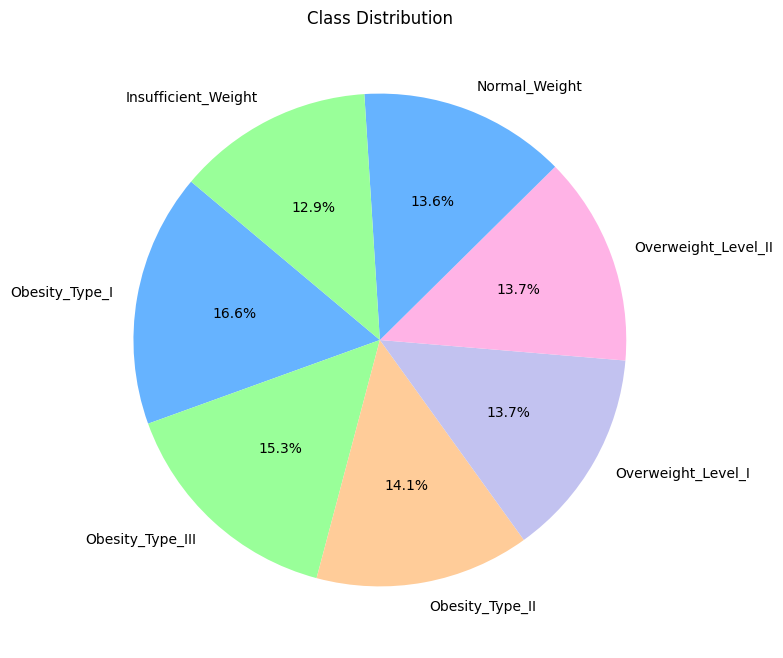

In [45]:

# Assuming the column representing classes is named 'class_column'
class_counts = data['NObeyesdad'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Class Distribution')
plt.show()




In [46]:
data.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
npartitions=1,,,,,,,,,,,,,,,,,
,object,int64,float64,float64,object,object,int64,int64,object,object,int64,object,int64,int64,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [47]:

data.shape
#shows new shape of data set

(Delayed('int-08440ab8-4f71-49c5-ba81-9b267206593b'), 17)

In [48]:
data.isnull()
#finding null vallues

data.isnull().sum()
# there area 0 null values.

Dask Series Structure:
npartitions=1
Age                               int64
family_history_with_overweight      ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers

In [54]:
non_numerical_columns = data.select_dtypes(exclude=['float', 'int']).columns
# find none-numerical data in dataset

# Step 3: Define label encoder function
def label_encode_partition(partition):
    for col in non_numerical_columns:
        le = LabelEncoder()
        partition[col] = le.fit_transform(partition[col])
    return partition

# Step 4: Apply label encoding to each partition
data = data.map_partitions(label_encode_partition, meta=data)

# Persist the result if you want to use it multiple times
data = data.persist()



In [55]:
print(data.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


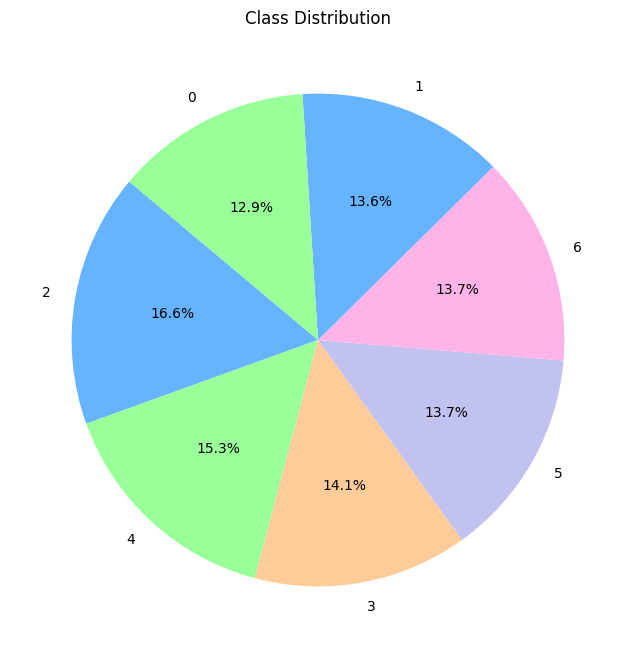

In [56]:

# Assuming the column representing classes is named 'class_column'
class_counts = data['NObeyesdad'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Class Distribution')
plt.show()




In [68]:


# Separate the target variable (y)
y = data['NObeyesdad']

# Drop the target variable column from the DataFrame to get features (X)
X = data.drop(columns=['NObeyesdad'])

In [65]:
def evaluate_preds(y_true, y_pred):
# performance metrics

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average="macro")
    recall = recall_score(y_true, y_pred,average="macro")
    f1 = f1_score(y_true, y_pred,average="macro")
# confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,)
    cm_display.plot()
    plt.show()



def validate_model(X, y, model, num_runs=1000, test_size=0.2, output=True):
    """
    Performs hold-out validation of a given model on the dataset provided (X, y).
    The default number of runs is 1000, and the default training/test split is 80/20.
    """
    # arrays for storing performance metrics; accuracy, precision and recall
    acc_list = np.array([])
    prec_list = np.array([])
    rec_list = np.array([])


    # capturing the start-time
    start_time = time()


    if output:
        print("Starting model validation")

    # runing `num_runs` number of validation runs of data splitting, training and testing
    for x in range(num_runs):
        # Hold-out validation - default 80% training and 20% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)

        # Training and testing the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        # Appending performance metrics to arrays created above
        acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
        prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro'))
        rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro'))


    # capturing the end-time and printing out
    end_time = time()

    if output:
        print("Completed %d validation runs in %.2f seconds\n" % (num_runs, end_time - start_time))

    return acc_list, prec_list, rec_list



result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

def add_result(model_name, acc_list, prec_list, rec_list):
    """
    Add a result row to a pandas dataframe (created above) for a model with name (model_name).
    mse_list, mae_list and me_list are array lists of performance results from different hold-out validation runs,
    coming from the validate_model() function, above.
    """
    global result_df # doing this to be able to access the gloval dataframe defined above the function

    new_row = {'Model':model_name, 'Accuracy':acc_list.mean(), 'Precision':prec_list.mean(), 'Recall':rec_list.mean()}
    result_df = pd.concat([result_df, pd.Series(new_row).to_frame().T])

    return result_df

def print_results(acc_list, prec_list, rec_list):
    """
    Prints out the mean ACCURACY, PRECISION and RECALL + 2 x standard deviation (STD).
    We multiply the STD by 2 because 95% of the data around the mean is within 2 standard deviations,
    so it gives us a good idea of the range of values around the mean.
    """
    print("ACC:   %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
    print("PREC:  %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
    print("REC:   %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))


def clear_results():
    """
    Clears the result dataframe.
    """
    global result_df
    result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])
num_runs = 1

ModuleNotFoundError: No module named 'dask_ml'

In [66]:
# model
model = RandomForestClassifier(n_estimators=200)

# arrays for storing performance metrics
acc_list, prec_list, rec_list= validate_model(X, y, model, num_runs)

# save the result
add_result('RF', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

# print out f1 score and confution table for the last iteration
y_preds = model.predict(X_test)
print(classification_report(y_test,y_preds))
evaluate_preds(y_test,y_preds)

Starting model validation


AttributeError: 'DataFrame' object has no attribute 'take'

In [ ]:
# resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='all')); X, y = resample.fit_resample(X, y)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
# arrays for storing performance metrics
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)

# save the result
add_result('LR', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

# print out f1 score and confution table for the last iteration
y_preds = model.predict(X_test)
print(classification_report(y_test,y_preds))
evaluate_preds(y_test,y_preds)